In [1]:
# can we all agree on where ceres should be at some times?

In [22]:
from astropy import units as u
from astropy.time import Time, TimeDelta
from astropy.coordinates import solar_system_ephemeris

solar_system_ephemeris.set("jpl")

from poliastro.bodies import Sun, Earth, Moon
from poliastro.ephem import Ephem, Planes
from poliastro.twobody import Orbit
from poliastro.twobody.sampling import EpochsArray

from astropy.coordinates import CartesianRepresentation, SkyCoord, EarthLocation, SkyCoord, AltAz

import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

In [23]:
from poliastro.core.angles import (
    D_to_nu as D_to_nu_fast,
    E_to_nu as E_to_nu_fast,
    F_to_nu as F_to_nu_fast,
    M_to_D as M_to_D_fast,
    M_to_E as M_to_E_fast,
    M_to_F as M_to_F_fast,
)

def true_anomaly_from_mean_poliastro_fast(ecc, M):
    ecc, M = ecc.value, M.to(u.rad).value
    if ecc < 1:
        M = (M + np.pi) % (2 * np.pi) - np.pi
        return E_to_nu_fast(M_to_E_fast(M, ecc), ecc) * u.rad
    elif ecc == 1: 
        return D_to_nu_fast(M_to_D_fast(M)) * u.rad
    else: 
        return F_to_nu_fast(M_to_F_fast(M, ecc), ecc) * u.rad

In [24]:
# https://en.wikipedia.org/wiki/Ceres_(dwarf_planet)
a=2.77 * u.au
e = 0.0785 * u.one
inc = 10.6 * u.deg
raan = 80.3* u.deg
mean_an = 291.4* u.deg
arg_of_peri = 73.6* u.deg

mjds = np.arange(60676, 60676+365*3, 30)

In [25]:
nu = true_anomaly_from_mean_poliastro_fast(e, mean_an)

orb = Orbit.from_classical(Sun, a, e, inc, raan, arg_of_peri, nu, plane=Planes.EARTH_ECLIPTIC)

In [26]:
times = Time(mjds, format='mjd')
ephem = orb.to_ephem(strategy=EpochsArray(epochs=times))
cart = ephem.sample()

In [27]:
c = SkyCoord(cart.x, cart.y, cart.z,
             representation_type='cartesian', obstime=times)
from_earth = c.gcrs

Text(0, 0.5, 'dec')

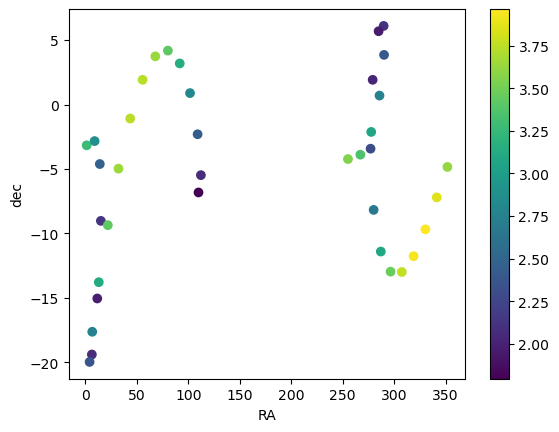

In [28]:
plt.scatter(from_earth.ra, from_earth.dec, c=from_earth.distance.to(u.au))
plt.colorbar()
plt.xlabel('RA')
plt.ylabel('dec')

Text(0, 0.5, 'dec')

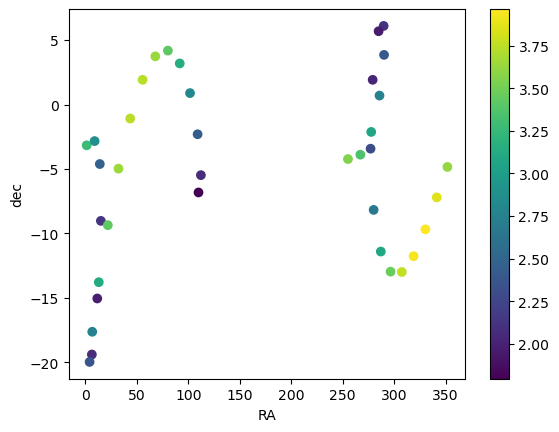

In [19]:
plt.scatter(from_earth.ra, from_earth.dec, c=from_earth.distance.to(u.au))
plt.colorbar()
plt.xlabel('RA')
plt.ylabel('dec')